# Import Required Libary

In [396]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [397]:
df=pd.read_csv("C:/Users/User/ML Prac/netflix.csv")


In [398]:
df['date_added'] = pd.to_datetime(df['date_added'])
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [399]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [400]:
df.shape

(8807, 12)

In [401]:
df.duplicated().sum()

0

In [402]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [403]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [404]:
df['date_added']=pd.to_datetime(df['date_added'])
df = df.astype({'release_year':'int'})

In [405]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int32
rating                  object
duration                object
listed_in               object
description             object
dtype: object

3. Non-Graphical Analysis: Value counts and unique attributes ​​(10 Points)


In [406]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1714
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [407]:
mask1 = (df['type'] == 'Movie')

#mask1['rating'].value_counts()
movie_rating=df[mask1]
movie_rating['rating'].value_counts()

TV-MA       2062
TV-14       1427
R            797
TV-PG        540
PG-13        490
PG           287
TV-Y7        139
TV-Y         131
TV-G         126
NR            75
G             41
TV-Y7-FV       5
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [408]:
#Find the Missing Data Percentage
null_count=df.isnull().sum()
#print(null_count)
((null_count)/len(df)*100)

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

<AxesSubplot:>

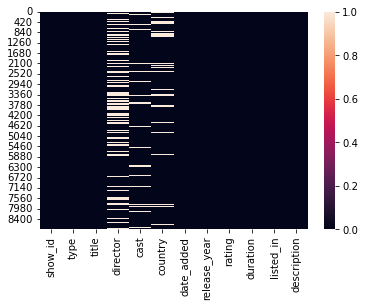

In [409]:
sns.heatmap(df.isnull())

Replace the Missing values for the columns =>  rating, Duration, date_added with the Highest Repeated Frequency in that Column

In [410]:
for ColName in df[['rating','duration','date_added']]:
    df[ColName].fillna(df[ColName].value_counts().index[0],inplace=True)

Fill All the missing values to => "Unknown" with fillna() Since it has High number of missing and can't replace with highest repeated value

In [411]:
for ColName in df[['cast','country','director']]:
    df[ColName].fillna("Unknown",inplace=True)

In [412]:
df.isnull().sum()


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [413]:
df['rating']= df['rating'].replace({
'TV-MA' :  'Adults',
'TV-14' :  'Teen- Age above 14',
'R'     :  'Adults',
'TV-PG' :  'Kids - with parental guidence',
'PG-13' :  'Teen- Age above 12',
'PG'    :  'Kids - with parental guidence',    
'TV-Y7' :  'Kids- Age above 7', 
'TV-Y'  :  'Kids',      
'TV-G'  :  'Kids', 
'NR'    :  'NR',
'G'     :  'Kids',    
'TV-Y7-FV':   'Kids- Age above 7', 
'NC-17' :  'Adults',  
'UR'    :  'UR'})

In [414]:
df[df['rating'].str.contains("min")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,1 Season,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,1 Season,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,1 Season,Movies,The comic puts his trademark hilarious/thought...


In [415]:
df.at[5541,'rating']='TV-MA'
df.at[5794,'rating']='TV-MA'
df.at[5813,'rating']='TV-MA'
df.at[5541,'duration']='74 min'
df.at[5794,'duration']='84 min'
df.at[5813,'duration']='66 min'
df['rating'].value_counts()

Adults                           4013
Teen- Age above 14               2160
Kids - with parental guidence    1150
Kids                              568
Teen- Age above 12                490
Kids- Age above 7                 340
NR                                 80
TV-MA                               3
UR                                  3
Name: rating, dtype: int64

4. Visual Analysis - Univariate, Bivariate after pre-processing of the data

Note: Pre-processing involves unnesting of the data in columns like Actor, Director, Country

4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis (10 Points)

4.2 For categorical variable(s): Boxplot (10 Points)

4.3 For correlation: Heatmaps, Pairplots (10 Points)

In [416]:
def unnest_Col_Values(df, ColName):
    print(f"----Data_Frame----{ColName}-----Created-----")
    df[ColName].apply(lambda x: str(x).split(', ')).tolist()
    constraint=df[ColName].apply(lambda x: str(x).split(', ')).tolist()
    df_new=pd.DataFrame(constraint,index=df['title'])
    df_new=df_new.stack()
    df_new=pd.DataFrame(df_new)
    df_new.reset_index(inplace=True)
    df_new=df_new[['title',0]]
    df_new.columns=['title',ColName]
    
    return df_new

df_cast = unnest_Col_Values(df, 'cast')
df_country = unnest_Col_Values(df, 'country')
df_listed_in = unnest_Col_Values(df, 'listed_in')
df_director = unnest_Col_Values(df, 'director')
    

----Data_Frame----cast-----Created-----
----Data_Frame----country-----Created-----
----Data_Frame----listed_in-----Created-----
----Data_Frame----director-----Created-----


In [417]:
df_cast_director = pd.merge(df_cast, df_director, on='title', how='inner')
df_cast_director.head()

,title,cast,director
0,Dick Johnson Is Dead,Unknown,Kirsten Johnson
1,Blood & Water,Ama Qamata,Unknown
2,Blood & Water,Khosi Ngema,Unknown
3,Blood & Water,Gail Mabalane,Unknown
4,Blood & Water,Thabang Molaba,Unknown


In [418]:
df_cast_director_genre = pd.merge(df_cast_director, df_listed_in, on='title', how='inner')
df_cast_director_genre.head()

,title,cast,director,listed_in
0,Dick Johnson Is Dead,Unknown,Kirsten Johnson,Documentaries
1,Blood & Water,Ama Qamata,Unknown,International TV Shows
2,Blood & Water,Ama Qamata,Unknown,TV Dramas
3,Blood & Water,Ama Qamata,Unknown,TV Mysteries
4,Blood & Water,Khosi Ngema,Unknown,International TV Shows


In [419]:
df_cast_director_genre_country = pd.merge(df_cast_director_genre, df_country, on='title', how='inner')
df_cast_director_genre_country.head()

,title,cast,director,listed_in,country
0,Dick Johnson Is Dead,Unknown,Kirsten Johnson,Documentaries,United States
1,Blood & Water,Ama Qamata,Unknown,International TV Shows,South Africa
2,Blood & Water,Ama Qamata,Unknown,TV Dramas,South Africa
3,Blood & Water,Ama Qamata,Unknown,TV Mysteries,South Africa
4,Blood & Water,Khosi Ngema,Unknown,International TV Shows,South Africa


In [420]:
df.drop(['director','cast','country','listed_in'],axis=1,inplace=True)

In [421]:
df_final = pd.merge(df, df_cast_director_genre_country, on='title', how='inner')
df_final.head()

,show_id,type,title,date_added,release_year,rating,duration,description,cast,director,listed_in,country
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teen- Age above 12,90 min,"As her father nears the end of his life, filmm...",Unknown,Kirsten Johnson,Documentaries,United States
1,s2,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown,International TV Shows,South Africa
2,s2,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown,TV Dramas,South Africa
3,s2,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown,TV Mysteries,South Africa
4,s2,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,Unknown,International TV Shows,South Africa


In [422]:
df_final1=df_final
df_final1.head()

,show_id,type,title,date_added,release_year,rating,duration,description,cast,director,listed_in,country
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teen- Age above 12,90 min,"As her father nears the end of his life, filmm...",Unknown,Kirsten Johnson,Documentaries,United States
1,s2,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown,International TV Shows,South Africa
2,s2,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown,TV Dramas,South Africa
3,s2,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown,TV Mysteries,South Africa
4,s2,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,Unknown,International TV Shows,South Africa


4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis (10 Points)

4.2 For categorical variable(s): Boxplot (10 Points)

4.3 For correlation: Heatmaps, Pairplots (10 Points)

<AxesSubplot:xlabel='type', ylabel='count'>

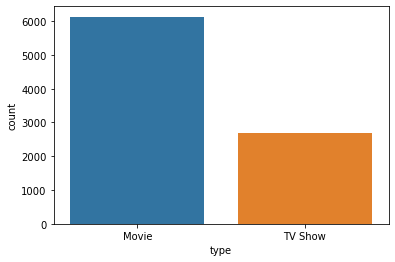

In [423]:
sns.countplot(data=df,x='type')

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='date_added', ylabel='Density'>

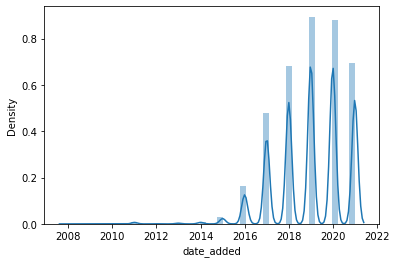

In [424]:
sns.distplot(df_final1['date_added'].dt.year)

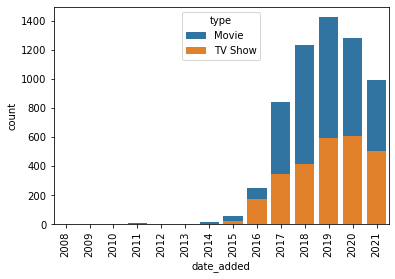

In [425]:
ax=sns.countplot(x=df['date_added'].dt.year,hue=df['type'],dodge = False)
ax.tick_params(axis='x', rotation=90)

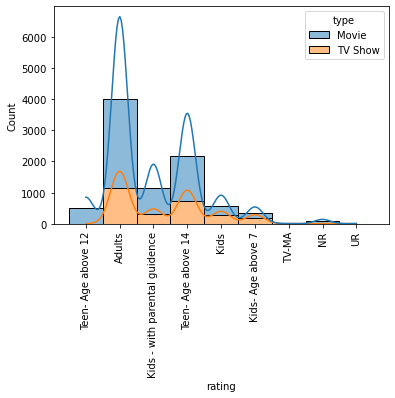

In [426]:
ax=sns.histplot(x=df['rating'],hue=df['type'],multiple="stack",kde=True)
ax.tick_params(axis='x', rotation=90)

<AxesSubplot:xlabel='release_year', ylabel='listed_in'>

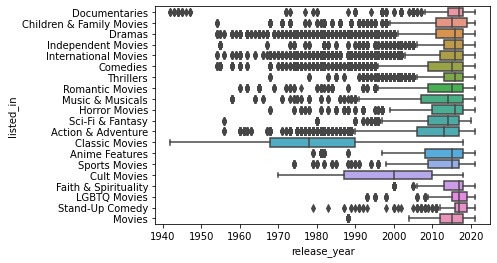

In [427]:
df_movie=df_final1[df_final1['type']=='Movie']
#df_movie['listed_in'].value_counts()
sns.boxplot(data=df_movie,y=df_movie['listed_in'],x=df_movie['release_year'])

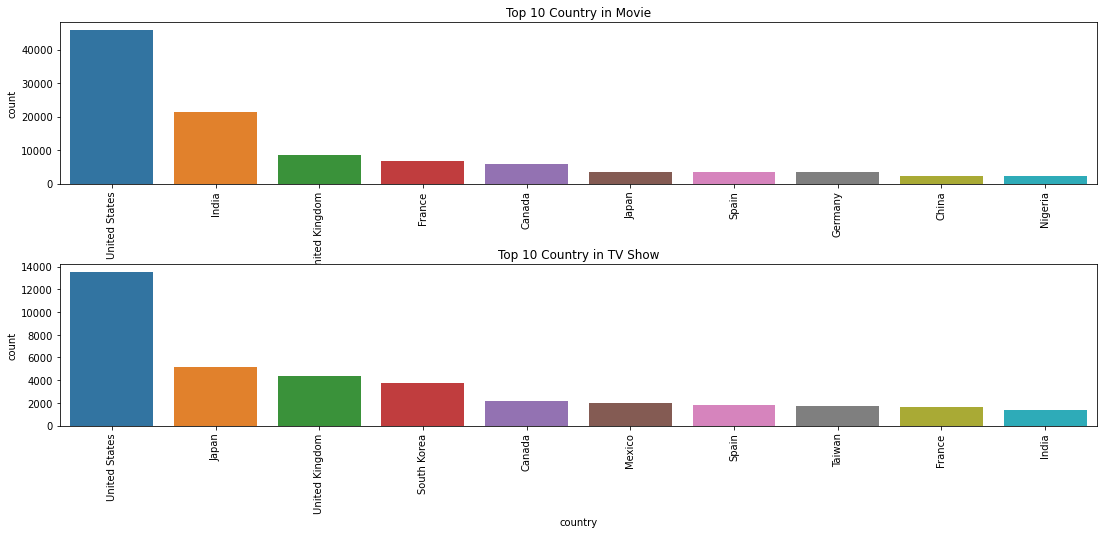

In [428]:
df_country_total=df_final1[['title','country','type']]
df_country_total=df_country_total[df_country_total['country']!='Unknown']
df_country_total=df_country_total.groupby(['type','country'])['title'].count().reset_index().sort_values('title', ascending=False)
df_country_total.rename(columns = {'title':'count'},inplace=True)
df_movie_country=df_country_total[df_country_total['type']=='Movie'].head(10)

df_TvShow_country=df_country_total[df_country_total['type']=='TV Show'].head(10)

fig, axes = plt.subplots(2, 1)
#Movie
sns.barplot(data=df_movie_country,x='country',y='count',ax=axes[0]).set(title='Top 10 Country in Movie')
axes[0].tick_params(axis='x', rotation=90)

sns.barplot(data=df_TvShow_country, x='country',y='count', ax=axes[1]).set(title='Top 10 Country in TV Show')
axes[1].tick_params(axis='x', rotation=90)
plt.subplots_adjust(left=0.1,bottom=0.1,right=2.5,top=1.5,wspace=0.5, hspace=0.5)


plt.show()

(1998.0, 2022.0)

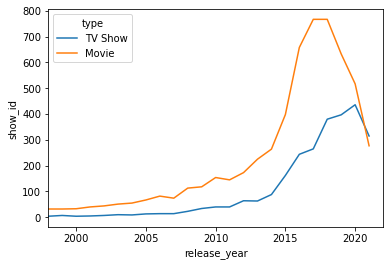

In [429]:
df_dist= df.groupby(["release_year","type"])["show_id"].count().reset_index()
ax=sns.lineplot(data=df_dist,x='release_year',y='show_id',hue='type')
ax.set_xlim(1998, 2022)


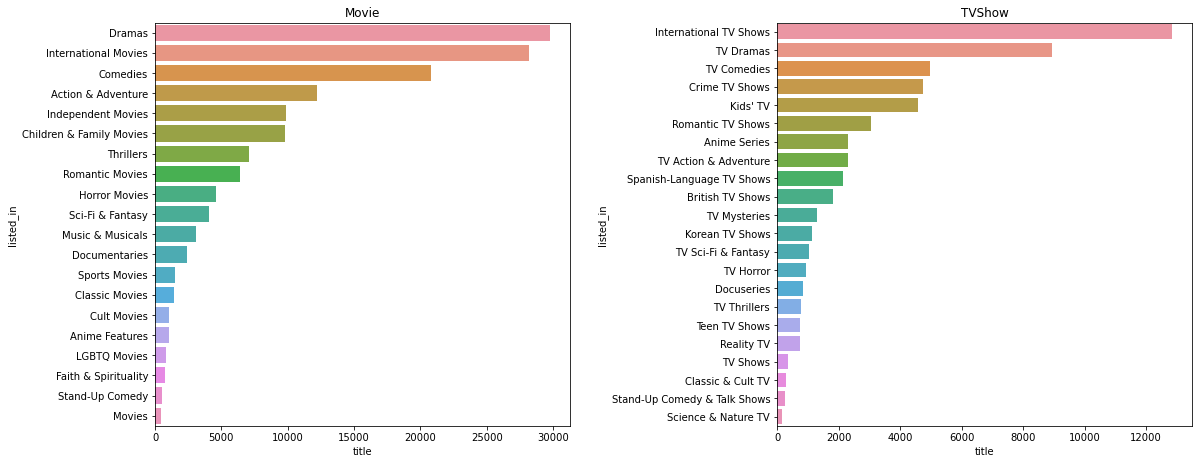

In [430]:
df_genre=df_final1[['title','type','listed_in']]
df_genre=df_genre.groupby(['listed_in','type'])['title'].count().reset_index().sort_values('title',ascending=False)
df_Movie_genre = df_genre[df_genre['type']=='Movie']
df_TVShow_genre = df_genre[df_genre['type']=='TV Show']
#sns.barplot(data=df_Movie_genre,x='title',y='listed_in')

fig, axes = plt.subplots(1, 2)

# Movie
sns.barplot(ax=axes[0], x=df_Movie_genre.title, y=df_Movie_genre.listed_in)
axes[0].set_title('Movie')
# TV Show
sns.barplot(ax=axes[1], x=df_TVShow_genre.title, y=df_TVShow_genre.listed_in)
axes[1].set_title('TVShow')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=2.5, 
                    top=1.5, 
                    wspace=0.5, 
                    hspace=0.5)
plt.show()

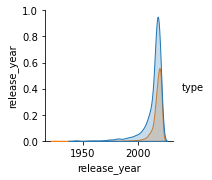

In [431]:
sns.pairplot(df, hue="type")

C:\Users\User\AppData\Local\Temp\ipykernel_5904\108242813.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie_duration['duration']=df_movie_duration['duration'].str.split(" ").str[0].astype(int)


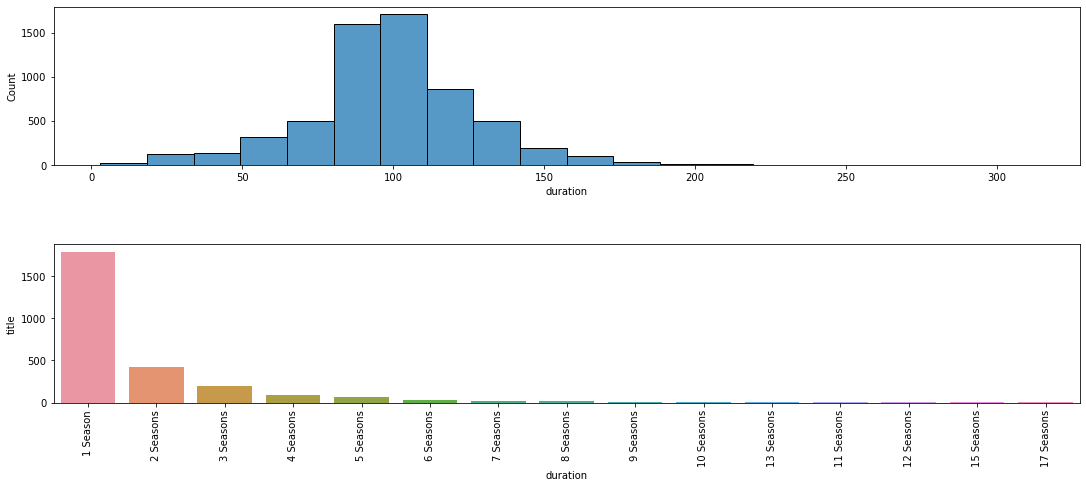

In [432]:
df_movie_duration=df[df['type']=='Movie']

df_movie_duration['duration']=df_movie_duration['duration'].str.split(" ").str[0].astype(int)

df_TVShow_duration=df[df['type']=='TV Show']
df_TVShow_duration=df_TVShow_duration[['title','duration']]
df_TVShow_duration=df_TVShow_duration.groupby(['duration'])['title'].count().reset_index().sort_values('title',ascending=False)

fig, axes = plt.subplots(2, 1)

#create chart in each subplot
sns.histplot(x=df_movie_duration['duration'],bins=20, ax=axes[0])

sns.barplot(data=df_TVShow_duration, x='duration',y='title', ax=axes[1])
axes[1].tick_params(axis='x', rotation=90)

plt.subplots_adjust(
                    right=2.5, 
                    top=1.5, 
                    hspace=0.5)

plt.show()



# Insight's

=> **Adults** and **Teen above age 17** Both caombined has high viewing time.
    So they are the Target Audience.
    
=> For Movies it is Around between **90min - 120 min**. For TV Show mostly have **1 Season** beacuse every TV Show's Have one Season.

=>  Movies which released between **1970-2000** are Classic Movies.Cult movie Are which released between  **1990-2010** 

=>  There is a Sight Drop in overall Movie & Tv Show Due to **Covid Pandemic or Some other reasons**



#  Business Decision      

=> **India has higher number of Movie than TV Shows**.So We Need to Focus on Launching More Movies in india than TV Shows.
Like Wise **South Korea has Higher Number of TV shows than Movies**.


=> A Lot of Movies & TV Show  with genre in **Drama, Comedy, Action, Adventure**
are most Common and Have Higher Audience.Therfore we can concenrate on similar Genre.


=> Most of our Viewer are **Adults** and **Teen Above age 17**.we Have to focus on more contents to satisfy the need of this Age group.